In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [49]:
train=pd.read_csv("Downloads/dataexport_20201208T120211.csv")
test=pd.read_csv("Downloads/dataexport_20201208T115950.csv")
train.head()

,location,Amadi Flats,Amadi Flats.1,Amadi Flats.2,Amadi Flats.3
0,lat,4.85007,4.85007,4.85007,4.85007
1,lon,7.13733,7.13733,7.13733,7.13733
2,asl,294.287,294.287,294.287,294.287
3,variable,Temperature,Relative Humidity,Wind Speed,Wind Direction
4,unit,°C,%,km/h,°


In [50]:
test.head()

,location,Ikeja Government Reserved Area,Ikeja Government Reserved Area.1,Ikeja Government Reserved Area.2,Ikeja Government Reserved Area.3
0,lat,6.66656,6.66656,6.66656,6.66656
1,lon,3.28125,3.28125,3.28125,3.28125
2,asl,31.127,31.127,31.127,31.127
3,variable,Temperature,Relative Humidity,Wind Speed,Wind Direction
4,unit,°C,%,km/h,°


In [51]:
print('Train Data Shape: {}'.format(train.shape))
print('Test Data Shape: {}'.format(test.shape))

Train Data Shape: (6667, 5)
Test Data Shape: (2625, 5)


In [52]:
train_missing_values=train.isnull().sum()
train_missing_values

location         2
Amadi Flats      2
Amadi Flats.1    2
Amadi Flats.2    2
Amadi Flats.3    2
dtype: int64

In [53]:
test_missing_values=test.isnull().sum()
test_missing_values

location                            0
Ikeja Government Reserved Area      0
Ikeja Government Reserved Area.1    0
Ikeja Government Reserved Area.2    0
Ikeja Government Reserved Area.3    0
dtype: int64

In [54]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('Test Data Shape: {}'.format(train_data.shape))
print('Test Data Shape: {}'.format(test_data.shape))

Test Data Shape: (6665, 5)
Test Data Shape: (2625, 5)


In [55]:
train_data["Amadi Flats.1"].value_counts()

91                                    345
89                                    326
88                                    250
90                                    238
96                                    204
                                     ... 
Abuloma                                 1
Rumuepirikom                            1
Water Side Relative Humidity [2 m]      1
Rumueme                                 1
Alakohia                                1
Name: Amadi Flats.1, Length: 158, dtype: int64

In [56]:
train_data["Amadi Flats.2"].value_counts()

7.8954163    74
6.489992     72
7.2          63
7.42159      58
8.209263     56
             ..
12.522619     1
14.759999     1
15.072783     1
17.555305     1
18.511143     1
Name: Amadi Flats.2, Length: 733, dtype: int64

In [57]:
train_data["Amadi Flats.3"].value_counts()

180            215
225            152
206.56505      125
216.8699       102
213.69006      102
              ... 
155.55605        1
185.04245        1
181.68468        1
219.2072         1
Rumukalagba      1
Name: Amadi Flats.3, Length: 785, dtype: int64

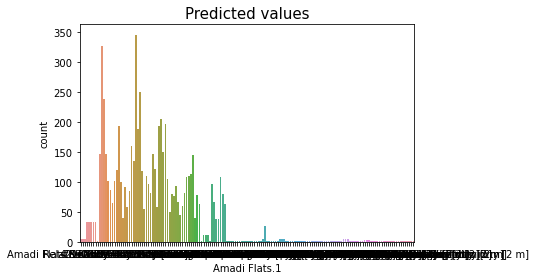

In [58]:
sns.countplot(x=train_data["Amadi Flats.1"])
plt.title("Predicted values",fontsize=15)
plt.show()

In [59]:
train_data.groupby(["Amadi Flats.2"])["Amadi Flats.3"].value_counts()

Amadi Flats.2                 Amadi Flats.3                   
0                             180                                 15
0.35999998                    180                                 17
0.5091169                     135                                  4
                              315                                  4
0.71999997                    180                                  1
                                                                  ..
Water Side                    Water Side                           1
Water Side Wind Speed [10 m]  Water Side Wind Direction [10 m]     1
Wind Speed                    Wind Direction                      33
hourly                        hourly                              33
km/h                          °                                   33
Name: Amadi Flats.3, Length: 1118, dtype: int64

In [ ]:
sns.countplot(x=train_data["Amadi Flats.1"],hue=train_data["Amadi Flats.2"])
plt.title("Amadi Flats.1 vs Amadi Flats.2",fontsize=15)
plt.show()

In [ ]:
str_data=train_data.select_dtypes(include=['object'])

In [ ]:
str_dt=test_data.select_dtypes(include=['object'])

In [ ]:
int_data=train_data.select_dtypes(include=['integer',"float"])
int_dt=test_data.select_dtypes(include=['integer',"float"])

In [ ]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

In [ ]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

In [ ]:
ytrain=features['Amadi Flats.1']
ytrain.head()

In [ ]:
xtrain=features['Amadi Flats.2']
xtrain.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain)